# Bibliotecas

In [1]:
import torch
from torchvision.transforms import v2
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

sys.path.append("/home/lucas/Image-Denoising/src")

import cv2
from PIL import Image
from noises import AddNoise
from transformation import get_transform_v2

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# 1. Open dataframe

In [2]:
path = "/home/lucas/Image-Denoising/dataframes/dataframe_v2.csv"
df = pd.read_csv(path)

In [3]:
train = df[df["split"] == 'train']
test = df[df["split"] == 'test']
val = df[df["split"] == 'val']

# 2. Transform functions

In [4]:
transform = get_transform_v2()

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [5]:
add_noise = AddNoise(scale=0.5)

In [6]:
add_noise

AddNoise()

# 3. Dataset object

In [71]:
class CustomImageDataset(Dataset):
    def __init__(self, dataframe:pd.DataFrame, transform:v2.Compose, noise_transform:v2.Compose):
        self.dataframe = dataframe
        self.transform = transform
        self.noise_transform = noise_transform

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        
        path,_,_,noise,_ = self.dataframe.iloc[idx]
        
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        noise_img = img.copy()
        noise_img = self.noise_transform(noise_img,noise_type)
        
        img = self.transform(img)
        noise_img = self.transform(noise_img)
   
        return img, noise_img

In [72]:
noise = AddNoise()

In [73]:
train_dataset = CustomImageDataset(train,transform,noise)

In [74]:
img, noise_img = train_dataset.__getitem__(82)

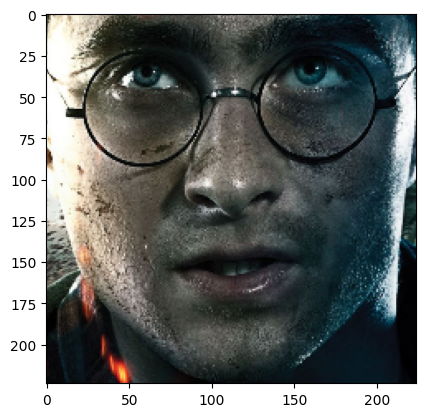

In [76]:
plt.imshow(img.permute(1,2,0))

# Testing Dataloader

In [7]:
from dataset import CustomImageDataset

In [8]:
val

,full_path,image_name,dataset,noise,split
15056,/media/ssd/lucas/image-denoising-dataset//hele...,272728945_1.png,helen,exponential,val
15057,/media/ssd/lucas/image-denoising-dataset//hele...,2985256877_1.png,helen,gaussian,val
15058,/media/ssd/lucas/image-denoising-dataset//hele...,1021890651_1.png,helen,salt_pepper,val
15059,/media/ssd/lucas/image-denoising-dataset//hele...,2203694817_1.png,helen,salt_pepper,val
15060,/media/ssd/lucas/image-denoising-dataset//hele...,2386722927_2.png,helen,uniform,val
...,...,...,...,...,...
18279,/media/ssd/lucas/image-denoising-dataset//300W...,outdoor_059.png,300W,poisson,val
18280,/media/ssd/lucas/image-denoising-dataset//300W...,outdoor_010.png,300W,salt_pepper,val
18281,/media/ssd/lucas/image-denoising-dataset//300W...,indoor_101.png,300W,poisson,val
18282,/media/ssd/lucas/image-denoising-dataset//300W...,indoor_269.png,300W,poisson,val


In [14]:
from torchvision.transforms import v2

transform = v2.Compose([
      v2.ToTensor(),
      v2.ToDtype(torch.float32,scale=True)
])

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [15]:
val_dataset = CustomImageDataset(val,transform,add_noise)

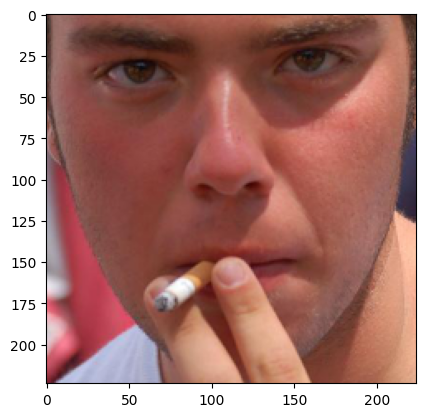

In [20]:
img, noise_img = val_dataset.__getitem__(5)
plt.imshow(img.permute(1,2,0))

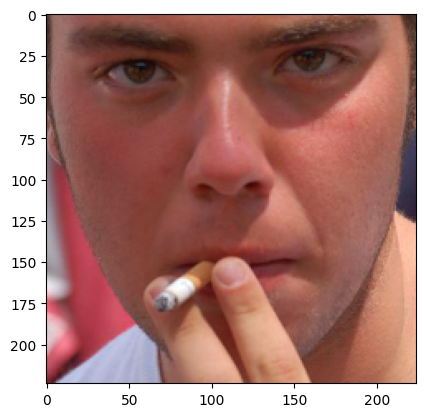

In [21]:
img, noise_img = val_dataset.__getitem__(5)
plt.imshow(noise_img.permute(1,2,0))

In [24]:
path,_,_,noise,_ = val_dataset.dataframe.iloc[5]
print(noise)
print(path)

poisson
/media/ssd/lucas/image-denoising-dataset//helen_crop_face/236817064_1.png


In [28]:
img_val = np.array(Image.open(path))

In [54]:
from noises import add_noise
from PIL import Image
import numpy as np
import cv2

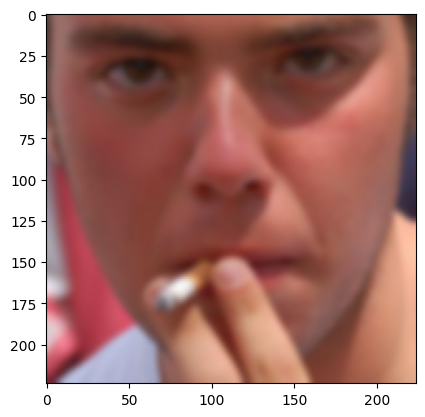

In [63]:
plt.imshow(cv2.GaussianBlur(img_val, (9,9), sigmaX=2))

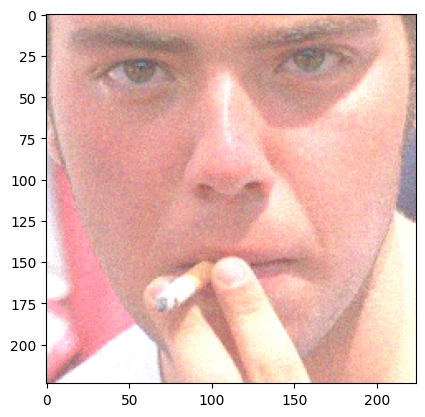

In [53]:
plt.imshow(add_noise(img_val,"poisson",scale=90))

In [33]:
?add_noise

Signature:
add_noise(
    image,
    noise_type='gaussian',
    scale=0.1,
    sigma=30,
    salt_pepper_amount=0.05,
)
Docstring:
Add non-Gaussian and Gaussian noise to an image.

Args:
- image: Input image (numpy array).
- noise_type: Type of non-Gaussian noise. Options: 'gaussian', 'uniform', 'exponential', 'poisson', 'salt_pepper'.
- scale: Scaling factor to adjust the magnitude of the noise.
- sigma: Standard deviation of Gaussian noise.
- salt_pepper_amount: Probability of adding salt or pepper noise.

Returns:
- Image with added non-Gaussian noise.
File:      ~/Image-Denoising/src/noises.py
Type:      function

In [27]:
val.iloc[8]['full_path']

'/media/ssd/lucas/image-denoising-dataset//helen_crop_face/1440501186_1.png'

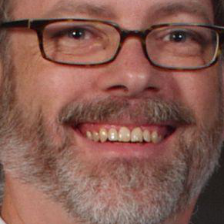